Loss Function หรือ Cost Function คือ การคำนวน Error ว่า yhat ที่โมเดลทำนายออกมา ต่างจาก y ของจริง อยู่เท่าไร เพื่อที่จะนำมาหา Gradient ของ Loss ขึ้นกับ Weight ต่าง ๆ ด้วย Backpropagation แล้วใช้อัลกอริทึม Gradient Descent ในการอัพเดทโมเดล เพื่อให้ Loss น้อยลง ในการเทรนรอบถัดไป

# 0. Import

In [19]:
import torch
from torch import tensor
import matplotlib.pyplot as plt

# 1. Data

เราจะสร้างข้อมูลตัวอย่างขึ้นมา เป็นสมการเส้นตรง

In [179]:
x = torch.arange(-50., 50.)
x

tensor([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40., -39.,
        -38., -37., -36., -35., -34., -33., -32., -31., -30., -29., -28., -27.,
        -26., -25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
        -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
         -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
         10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
         46.,  47.,  48.,  49.])

ประกาศฟังก์ชัน f(x) = y = ax + b

In [184]:
a = 4
b = 2

# a = -2
# b = 2

def f(x):
    return (a * x) + b

## yhat

นำ x ผ่านฟังก์ชัน ได้ค่า yhat

In [185]:
yhat = f(x)
yhat

tensor([-198., -194., -190., -186., -182., -178., -174., -170., -166., -162.,
        -158., -154., -150., -146., -142., -138., -134., -130., -126., -122.,
        -118., -114., -110., -106., -102.,  -98.,  -94.,  -90.,  -86.,  -82.,
         -78.,  -74.,  -70.,  -66.,  -62.,  -58.,  -54.,  -50.,  -46.,  -42.,
         -38.,  -34.,  -30.,  -26.,  -22.,  -18.,  -14.,  -10.,   -6.,   -2.,
           2.,    6.,   10.,   14.,   18.,   22.,   26.,   30.,   34.,   38.,
          42.,   46.,   50.,   54.,   58.,   62.,   66.,   70.,   74.,   78.,
          82.,   86.,   90.,   94.,   98.,  102.,  106.,  110.,  114.,  118.,
         122.,  126.,  130.,  134.,  138.,  142.,  146.,  150.,  154.,  158.,
         162.,  166.,  170.,  174.,  178.,  182.,  186.,  190.,  194.,  198.])

## y

ส่วนค่า y ที่เราต้องการจริง ๆ เป็นดังนี้

In [186]:
y = tensor([102., 100.,  98.,  96.,  94.,  92.,  90.,  88.,  86.,  84.,  82.,  80.,
         78.,  76.,  74.,  72.,  70.,  68.,  66.,  64.,  62.,  60.,  58.,  56.,
         54.,  52.,  50.,  48.,  46.,  44.,  42.,  40.,  38.,  36.,  34.,  32.,
         30.,  28.,  26.,  24.,  22.,  20.,  18.,  16.,  14.,  12.,  10.,   8.,
          6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16.,
        -18., -20., -22., -24., -26., -28., -30., -32., -34., -36., -38., -40.,
        -42., -44., -46., -48., -50., -52., -54., -56., -58., -60., -62., -64.,
        -66., -68., -70., -72., -74., -76., -78., -80., -82., -84., -86., -88.,
        -90., -92., -94., -96.])
y

tensor([102., 100.,  98.,  96.,  94.,  92.,  90.,  88.,  86.,  84.,  82.,  80.,
         78.,  76.,  74.,  72.,  70.,  68.,  66.,  64.,  62.,  60.,  58.,  56.,
         54.,  52.,  50.,  48.,  46.,  44.,  42.,  40.,  38.,  36.,  34.,  32.,
         30.,  28.,  26.,  24.,  22.,  20.,  18.,  16.,  14.,  12.,  10.,   8.,
          6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16.,
        -18., -20., -22., -24., -26., -28., -30., -32., -34., -36., -38., -40.,
        -42., -44., -46., -48., -50., -52., -54., -56., -58., -60., -62., -64.,
        -66., -68., -70., -72., -74., -76., -78., -80., -82., -84., -86., -88.,
        -90., -92., -94., -96.])

## เปรียบเทียบ y, yhat

นำมาพล็อตกราฟ เปรียบเทียบกัน

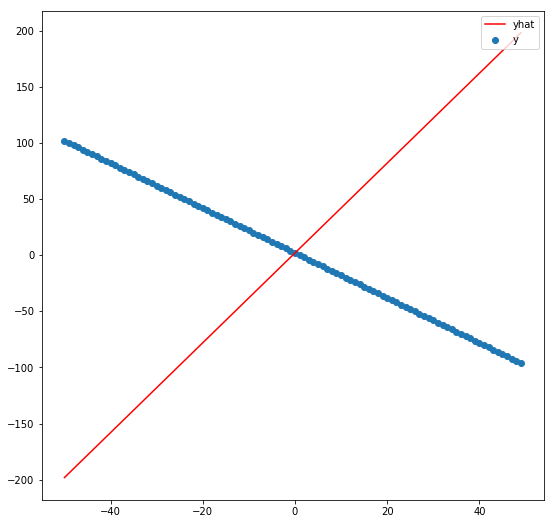

In [187]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.scatter(x, y, label="y")
ax.plot(x.numpy(), yhat.numpy(), label="yhat", color='red')
ax.legend(loc='upper right')

# 2. Mean Abolute Error (MAE) หรือ L1 Loss

Mean Abolute Error (MAE) หรือ L1 Loss คือ การคำนวน Error ว่า yhat ต่างจาก y อยู่เท่าไร ด้วยการนำมาลบกันตรง ๆ แล้วหาค่าเฉลี่ย โดยไม่สนใจเครื่องหมาย (Absolute) เพื่อหาขนาดของ Error โดยไม่สนใจทิศทาง

## 2.1 สูตร MAE

$$\mathrm{MAE} = \frac{\sum_{i=1}^n\left| y_i-\hat{y_i}\right|}{n}$$

## 2.2 โค้ด MAE Function

In [188]:
def mae(y, yhat):
    return (y - yhat).abs().mean()

## 2.3 การใช้งาน MAE

In [189]:
error = mae(y, yhat)
error

tensor(150.)

## 2.4 Diff ของ MAE

Diff ของ MAE จะได้ค่าคงที่ c มีคุณสมบัติพิเศษ ทำให้ Gradient เป็นค่าคงที่ ทำให้ขณะเทรน Weight ถูกลบไปด้วยค่าคงที่ ไปเรื่อย ๆ จนเท่ากับ 0 ได้ เป็นการทำลาย Weight ที่ไม่จำเป็นทิ้งไป ทำให้โมเดลมีขนาดเล็กลง

## 2.5 เปรียบเทียบ Loss

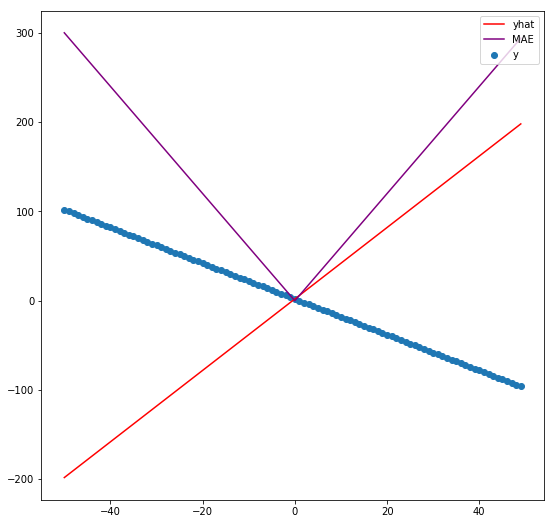

In [190]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.scatter(x, y, label="y")
ax.plot(x.numpy(), yhat.numpy(), label="yhat", color='red')
ax.plot(x.numpy(), (y - yhat).abs().numpy(), label="MAE", color='purple')
ax.legend(loc='upper right')

# 3. Mean Squared Error (MSE) หรือ L2 Loss

Mean Squared Error (MSE) หรือ L2 Loss คือ การคำนวน Error ว่า yhat ต่างจาก y อยู่เท่าไร ด้วยการนำมาลบกัน แล้วยกกำลังสอง (Squared) เพื่อไม่ต้องสนใจค่าติดลบ (ถ้ามี) แล้วหาค่าเฉลี่ย

เนื่องจากมีการยกกำลังสอง ทำให้ yhat ตัวไหนที่ผิดจาก y ไปมาก จะถูกให้ความสำคัญมากกว่า yhat ตัวอื่น ๆ มีผลทำให้ Error สูง

## 3.1 สูตร MSE

$$\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2$$

## 3.2 โค้ด MSE Function

In [191]:
def mse(y, yhat):
    return (y - yhat).pow(2).mean()

## 3.3 การใช้งาน MSE

In [192]:
error = mse(y, yhat)
error

tensor(30006.)

## 3.4 Diff ของ MSE

Diff ของ MSE จะได้เท่ากับ 2x มีคุณสมบัติพิเศษ ทำให้ Gradient เป็นสัดส่วนกับ x ทำให้ขณะเทรน Weight ถูกลบไปด้วยค่าที่เป็นสัดส่วนกับ x เล็กลงไปเรื่อย ๆ แต่ไม่เท่ากับ 0 เป็นรักษา Weight ให้ใช้ Weight ทุกตัว ทำให้โมเดลมีขนาดเท่าเดิม

## 3.5 เปรียบเทียบ Loss

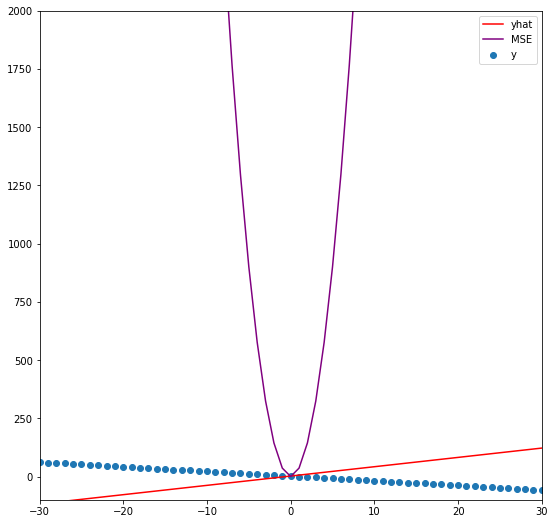

In [197]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.set_xlim([-30, 30])
ax.set_ylim([-100, 2000])
ax.scatter(x, y, label="y")
ax.plot(x.numpy(), yhat.numpy(), label="yhat", color='red')
ax.plot(x.numpy(), (y - yhat).pow(2).numpy(), label="MSE", color='purple')
ax.legend(loc='upper right')

# 4. RMSE หรือ RMSD

## 4.1 สูตร RMSE

$$\operatorname{RMSD}=\sqrt{\frac{\sum_{i=1}^n ( y_i - \hat y_i)^2}{n}}$$

Root Mean Squared Error (RMSE) หรือ Root Mean Squared Deviation (RMSD) คือ นำ MSE มาหา Squared Root

## 4.2 โค้ด RMSE Function

In [198]:
def rmse(y, yhat):
    return ((y - yhat).pow(2).mean()).sqrt()

## 4.3 การใช้งาน RMSE

In [ ]:
error = rmse(y, yhat)
error

## 4.4 Diff ของ RMSE

## 4.5 เปรียบเทียบ Loss

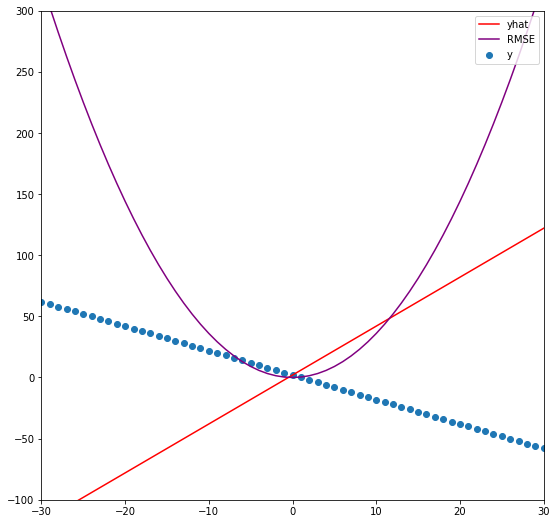

In [202]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.set_xlim([-30, 30])
ax.set_ylim([-100, 300])
ax.scatter(x, y, label="y")
ax.plot(x.numpy(), yhat.numpy(), label="yhat", color='red')
ax.plot(x.numpy(), ((y - yhat).pow(2)/len(y)).numpy(), label="RMSE", color='purple')
ax.legend(loc='upper right')